# Analysis of numpy.random Python Package
Author: David Maguire
***


***
## numpy.random

https://numpy.org/doc/stable/reference/random/index.html

[This earlier version](https://numpy.org/doc/1.16/reference/routines.random.html) has a better layout in my opinion although some function are not the same

The numpy random package is used to create pseudorandom elements. The term pseudorandom is used because computers cannot come up with truly random numbers without some sort of external factor. If that external factor is known, the "randomness" produced by the Random Number Generators (RNG) could be reproduced.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import default_rng
from numpy.random import Generator, PCG64, MT19937

In [2]:
plt.style.use('classic')

In [3]:
rng = np.random.default_rng(2021)

#### Just to note, although a seed is used in the above cell, the plots will not have the same data when repeatedly ran, only the same sequence of data (so the first chart will always be the same). In order to get the same data when repeating the cells below, the seed must be called within the cell. Simply uncomment the top line in each cell to do this.

### Process for generating random array of numbers

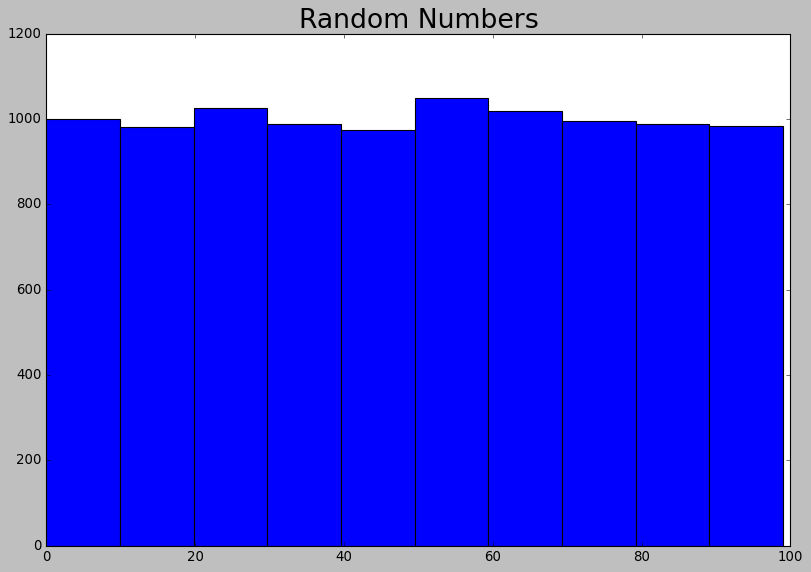

In [4]:
# rng = np.random.default_rng(2021)

# Call default_rng to get a new instance of a generator
rarray = rng.integers(0,100,10000)
# rarray
fig, ax = plt.subplots(figsize = (12,8))
ax.set_title('Random Numbers', fontsize = '24')
ax.hist(rarray)
plt.show;

***
## Simple Random Data and Permutations

## Simple Random Data

## Permutations

***
## Distributions

### Uniform Distribution

https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.uniform.html#numpy.random.Generator.uniform

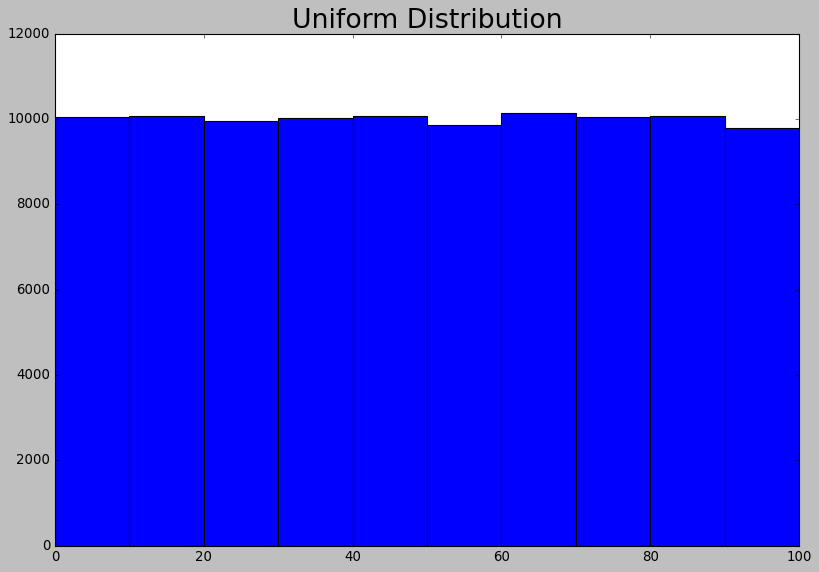

In [5]:
# rng = np.random.default_rng(2021)

rng = np.random.default_rng()
uarray = rng.uniform(0,100,100000)
fig, ax = plt.subplots(figsize = (12,8))
ax.hist(uarray)
ax.set_title('Uniform Distribution', fontsize = '24')
plt.show;

***

### Normal Distribution

https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.normal.html#numpy.random.Generator.normal

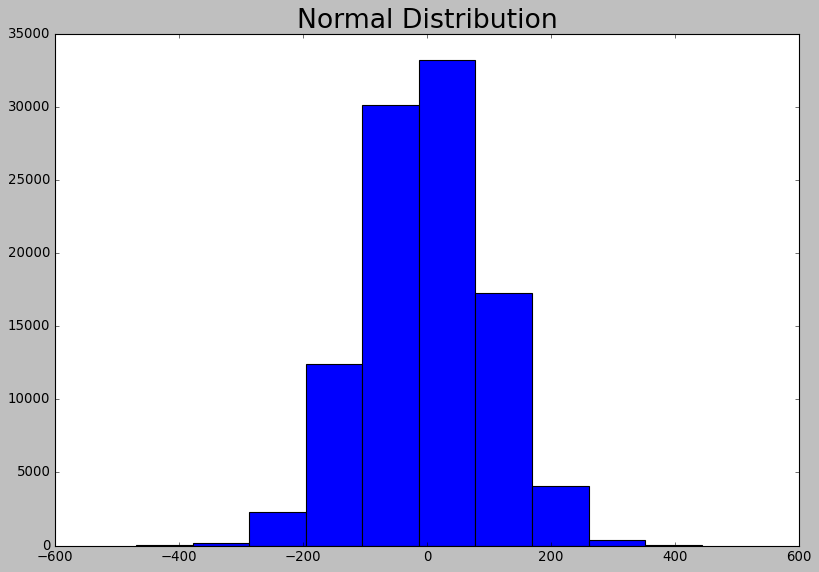

In [6]:
# rng = np.random.default_rng(2021)

normalarray = rng.normal(0,100,100000)
fig, ax = plt.subplots(figsize = (12,8))
ax.hist(normalarray)
ax.set_title('Normal Distribution', fontsize = '24')
plt.show;

***

### Binomial Distribution

https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.binomial.html#numpy.random.Generator.binomial

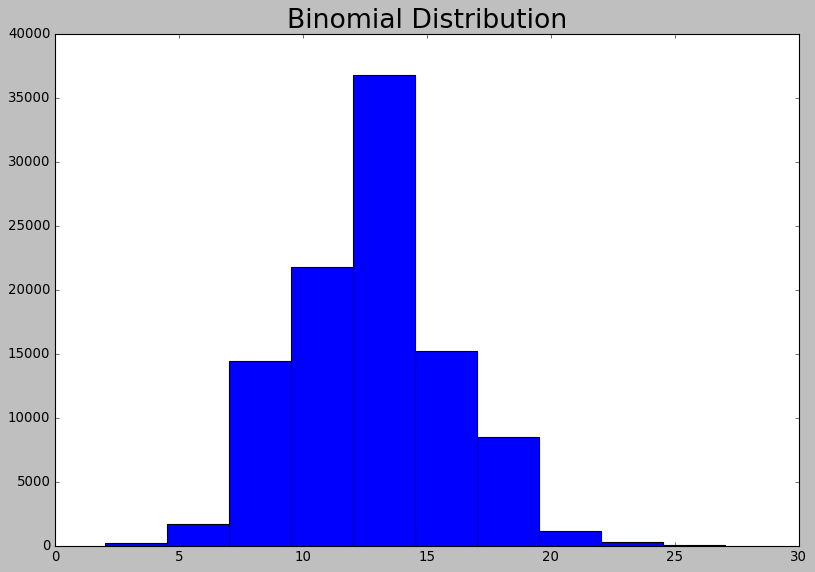

In [7]:
# rng = np.random.default_rng(2021)

n , p = 50, 0.25
biarray = rng.binomial(n , p ,100000)
fig, ax = plt.subplots(figsize = (12,8))
ax.hist(biarray)
ax.set_title('Binomial Distribution', fontsize = '24')
plt.show;

***

### Exponential Distribution

https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.exponential.html#numpy.random.Generator.exponential

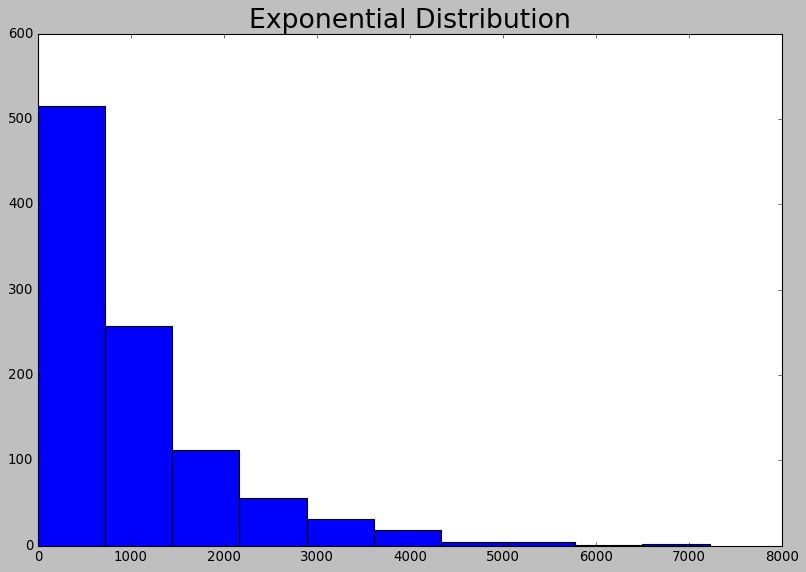

In [8]:
# rng = np.random.default_rng(2021)

exarray = rng.exponential(size=1000, scale=1000)
fig, ax = plt.subplots(figsize = (12,8))
ax.hist(exarray)
ax.set_title('Exponential Distribution', fontsize = '24')
plt.show;

***

### Gamma Distribution

https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.gamma.html#numpy.random.Generator.gamma

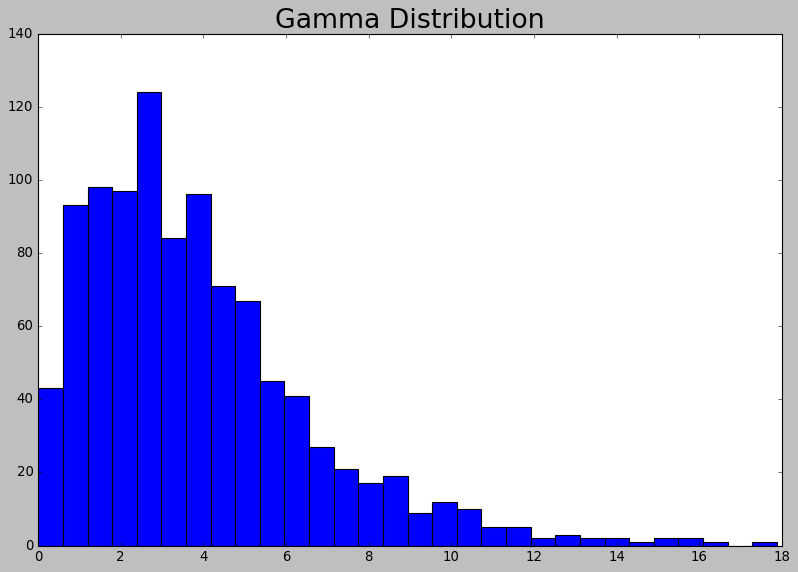

In [9]:
# rng = np.random.default_rng(2021)

shape, scale = 2., 2.
garray = rng.gamma(shape, scale, 1000)
fig, ax = plt.subplots(figsize = (12,8))
ax.hist(garray, bins = 30)
ax.set_title('Gamma Distribution', fontsize = '24')
plt.show();

***
## Seeds

***
## References

These will be tidyed up closer to the submission of the assignment:

-https://www.cs.hmc.edu/tr/hmc-cs-2014-0905.pdf bit generator paper

-https://www.pcg-random.org/ PCG number generators

-https://towardsdatascience.com/random-seed-numpy-786cf7876a5f Article on random numbers in numpy

-https://www.freecodecamp.org/news/random-number-generator/ Articla on Random Number Generators

-https://www.datacamp.com/community/tutorials/probability-distributions-python Random Distributions

-https://towardsdatascience.com/practical-guide-to-common-probability-distributions-in-machine-learning-487f6137625 More Random Distributions

***
# End